## Importing the libraries

In [222]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [224]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.losses import sparse_softmax_cross_entropy # For Deprecated Errors

In [225]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier,XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA

In [226]:
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## Importing/Unzip the Dataset

To get the dataset, run the following command in the terminal:

1- pip install kaggle

2- Create New API Token in Kaggle Account and place the file in C:/Users/<username>/.kaggle/(.json format)

3- run the following command: kaggle datasets download -d jkraak/bitcoin-price-dataset

In [227]:
# import zipfile
# with zipfile.ZipFile('bitcoin-price-dataset.zip', 'r') as zip_ref:
#     zip_ref.extractall('dataset')

In [228]:
main_df = pd.read_csv('dataset/bitcoin_2017_to_2023.csv')

main_df = main_df[::-1]

## Data Analysis

In [229]:

print('Total number of days present in the dataset: ',main_df.shape[0])
print('Total number of fields present in the dataset: ',main_df.shape[1])

Total number of days present in the dataset:  3126000
Total number of fields present in the dataset:  10


In [230]:
main_df.head()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
3125999,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,7564.906851,3,0.075183,320.390851
3125998,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,0.000000,0,0.000000,0.000000
3125997,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1117.542921,2,0.261074,1117.542921
3125996,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,51.171852,3,0.012008,51.171852
3125995,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,599.999338,1,0.140796,599.999338


In [231]:
main_df.tail()

,timestamp,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
4,2023-08-01 13:15:00,28896.00,28907.42,28893.03,28907.41,37.74657,1.090761e+06,686,16.50452,476955.246611
3,2023-08-01 13:16:00,28907.41,28912.74,28907.41,28908.53,15.89610,4.595556e+05,483,10.22981,295738.166916
2,2023-08-01 13:17:00,28908.52,28908.53,28902.48,28902.49,11.52263,3.330532e+05,451,2.70873,78290.170121
1,2023-08-01 13:18:00,28902.48,28902.49,28902.48,28902.49,4.77589,1.380351e+05,317,2.24546,64899.385195
0,2023-08-01 13:19:00,28902.48,28902.49,28902.48,28902.49,4.68658,1.354538e+05,258,0.89391,25836.224836


In [232]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3126000 entries, 3125999 to 0
Data columns (total 10 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   timestamp                     object 
 1   open                          float64
 2   high                          float64
 3   low                           float64
 4   close                         float64
 5   volume                        float64
 6   quote_asset_volume            float64
 7   number_of_trades              int64  
 8   taker_buy_base_asset_volume   float64
 9   taker_buy_quote_asset_volume  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 238.5+ MB


In [233]:
main_df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume
count,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06,3.126000e+06
mean,2.008947e+04,2.010217e+04,2.007666e+04,2.008946e+04,5.290800e+01,1.155882e+06,1.018583e+03,2.632231e+01,5.727211e+05
std,1.605896e+04,1.606926e+04,1.604871e+04,1.605896e+04,9.774388e+01,2.335868e+06,1.817813e+03,4.972880e+01,1.193135e+06
min,2.830000e+03,2.830000e+03,2.817000e+03,2.817000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.624747e+03,7.629600e+03,7.620000e+03,7.624798e+03,1.120167e+01,1.122335e+05,1.500000e+02,5.100715e+00,5.125057e+04
50%,1.169999e+04,1.170681e+04,1.169249e+04,1.170000e+04,2.387539e+01,3.706467e+05,4.130000e+02,1.148990e+01,1.753695e+05
75%,2.989957e+04,2.990724e+04,2.989051e+04,2.989957e+04,5.393630e+01,1.276762e+06,1.026000e+03,2.693009e+01,6.210250e+05
max,6.900000e+04,6.900000e+04,6.878670e+04,6.900000e+04,5.877775e+03,1.459557e+08,1.073150e+05,3.537453e+03,8.947551e+07


### Checking for null values

In [234]:
print('Null Values:',main_df.isnull().values.sum())

Null Values: 0


In [235]:
print('NA values:',main_df.isnull().values.any())

NA values: False


In [236]:
sd = main_df.iloc[0].iloc[0]
ed = main_df.iloc[-1].iloc[0]

print('Starting Date:', sd)
print('Ending Date:', ed)


Starting Date: 2017-08-17 04:00:00
Ending Date: 2023-08-01 13:19:00


In [237]:
main_df_explore = main_df.copy()
main_df_explore.set_index('timestamp',inplace=True)
main_df_explore.index = pd.to_datetime(main_df_explore.index)

In [238]:
dashboard_data = main_df_explore[['close', 'volume']].resample('D').last()

fig1 = px.line(dashboard_data, x=dashboard_data.index, y='close', labels={'close':'Bitcoin Close Price'})
fig1.update_layout(title='Bitcoin Close Price Trends', xaxis_title='Date', yaxis_title='Price(USD)')

fig2 = px.bar(dashboard_data, x=dashboard_data.index, y='volume', labels={'volume':'Trading Volume'})
fig2.update_layout(title='Bitcoin Trading Volume', xaxis_title='Date', yaxis_title='Volume')

fig1.show()
fig2.show()

## Data Preprocessing

In [239]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'])
main_df['Year'] = main_df['timestamp'].dt.year
main_df['Month'] = main_df['timestamp'].dt.month
main_df['Day'] = main_df['timestamp'].dt.day
main_df['Weekday'] = main_df['timestamp'].dt.weekday
main_df['WeekOfYear'] = main_df['timestamp'].dt.isocalendar().week
main_df['Quarter'] = main_df['timestamp'].dt.quarter
main_df['DayOfYear'] = main_df['timestamp'].dt.dayofyear
main_df['IsWeekend'] = main_df['timestamp'].dt.weekday >= 5
main_df['IsStartOfMonth'] = main_df['timestamp'].dt.is_month_start
main_df['IsEndOfMonth'] = main_df['timestamp'].dt.is_month_end
main_df.index.freq = 'D'

In [240]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'])

main_df['timestamp_hour'] = main_df['timestamp'].dt.floor('h')

main_df_hourly = main_df.groupby('timestamp_hour').first()

main_df_hourly.index = pd.to_datetime(main_df_hourly.index)

In [241]:
main_df_hourly = main_df_hourly.drop(columns=['timestamp'])
main_df_hourly.sample(1)

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,Year,Month,Day,Weekday,WeekOfYear,Quarter,DayOfYear,IsWeekend,IsStartOfMonth,IsEndOfMonth
timestamp_hour,,,,,,,,,,,,,,,,,,,
2020-09-30 05:00:00,10752.8,10752.8,10739.31,10739.36,27.801093,298703.29074,447,8.065194,86655.425292,2020,9,30,2,40,3,274,False,False,True


In [242]:
main_df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52082 entries, 2017-08-17 04:00:00 to 2023-08-01 13:00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          52082 non-null  float64
 1   high                          52082 non-null  float64
 2   low                           52082 non-null  float64
 3   close                         52082 non-null  float64
 4   volume                        52082 non-null  float64
 5   quote_asset_volume            52082 non-null  float64
 6   number_of_trades              52082 non-null  int64  
 7   taker_buy_base_asset_volume   52082 non-null  float64
 8   taker_buy_quote_asset_volume  52082 non-null  float64
 9   Year                          52082 non-null  int32  
 10  Month                         52082 non-null  int32  
 11  Day                           52082 non-null  int32  
 12  Weekday                  

In [243]:
#testing purposes
main_df_hourly.to_csv('testing.csv')

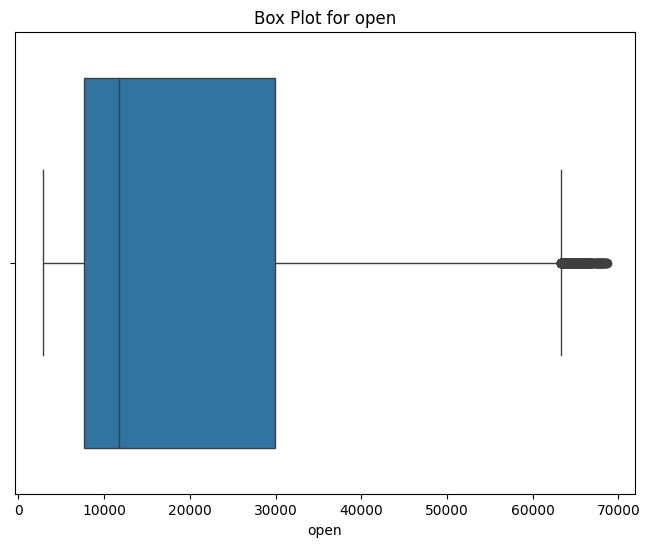

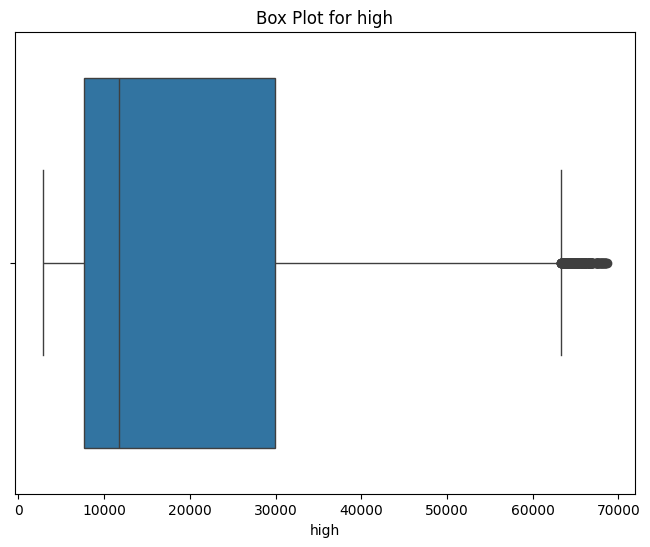

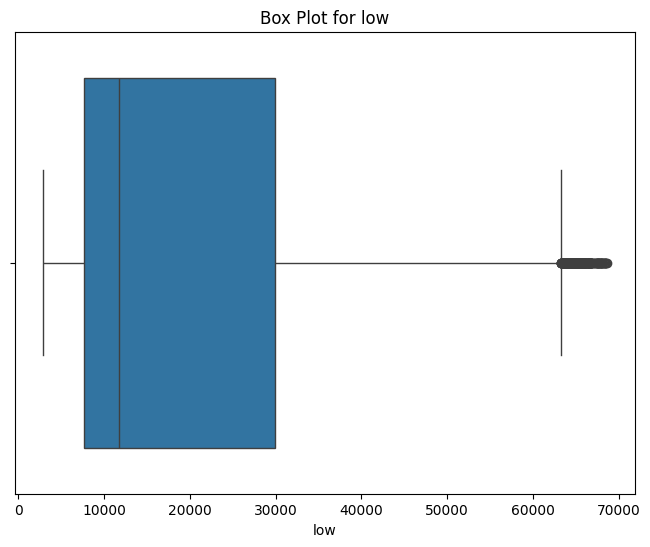

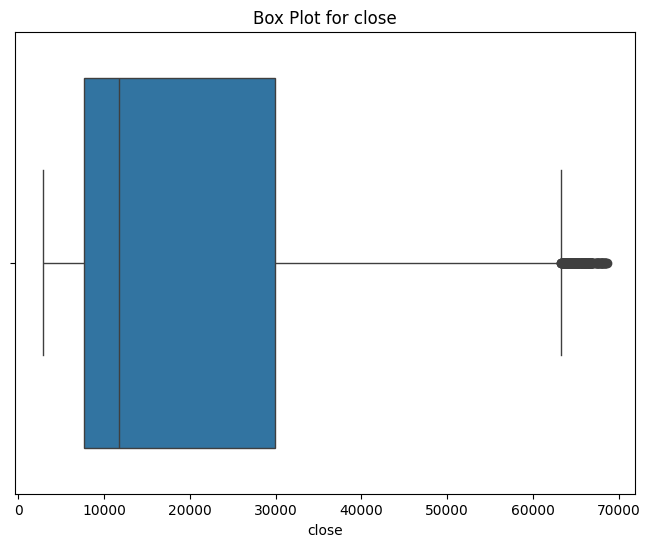

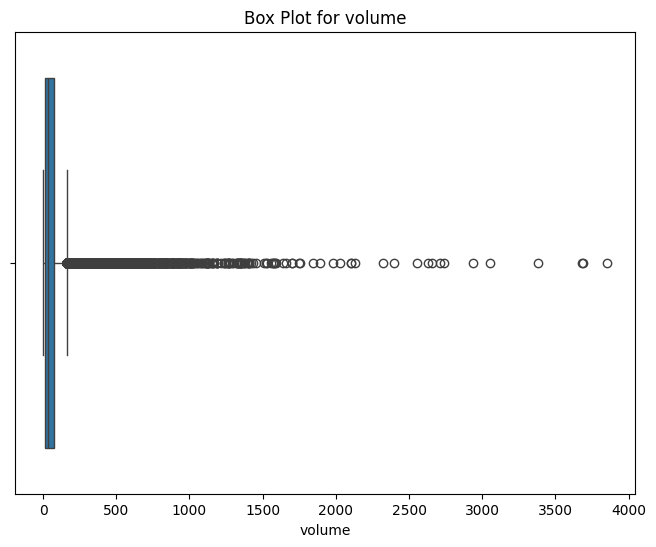

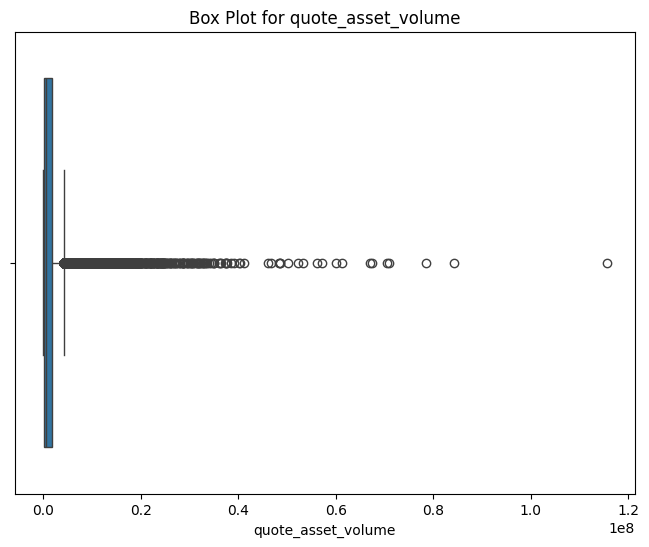

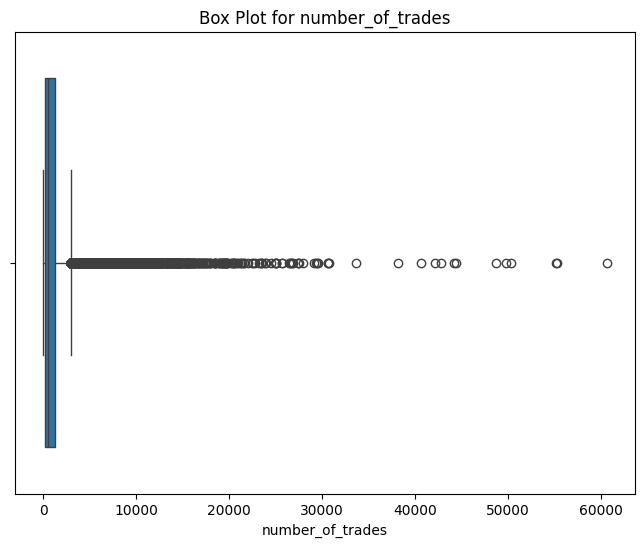

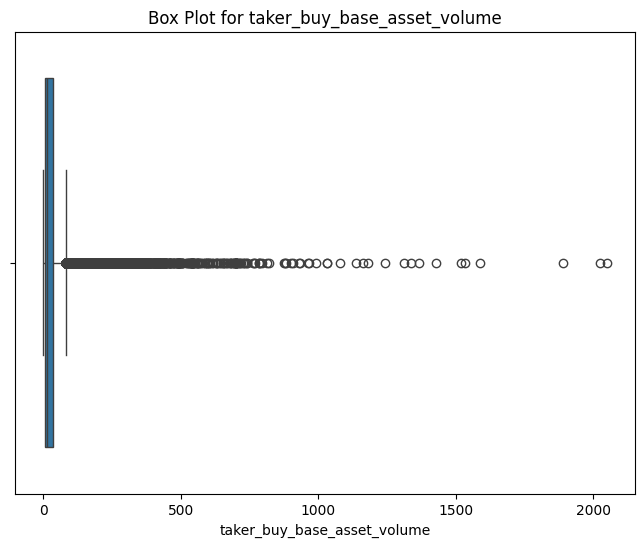

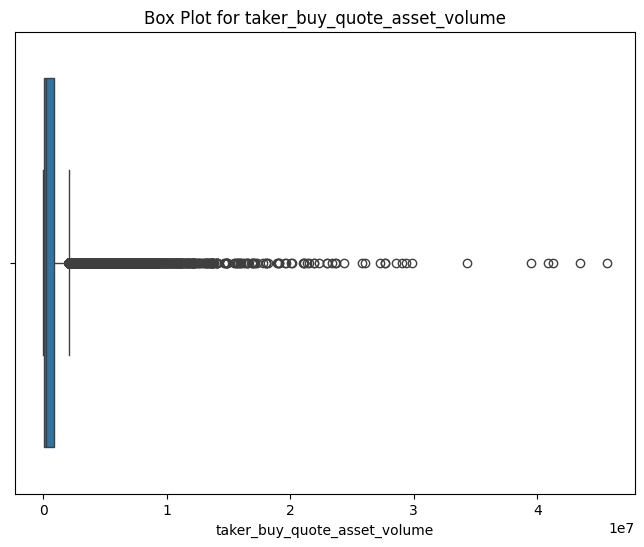

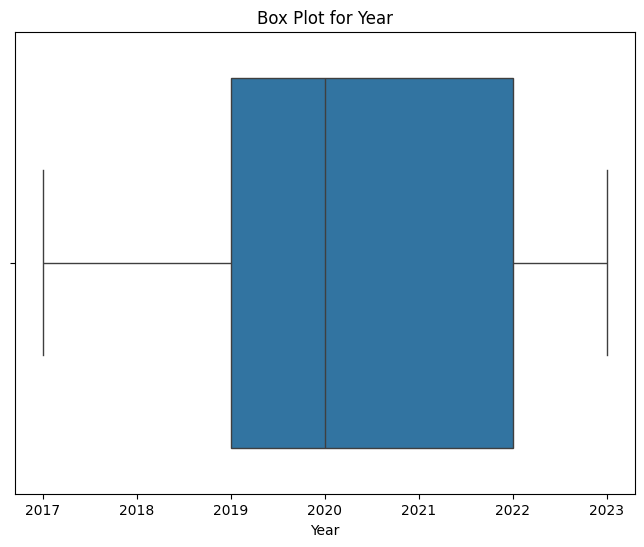

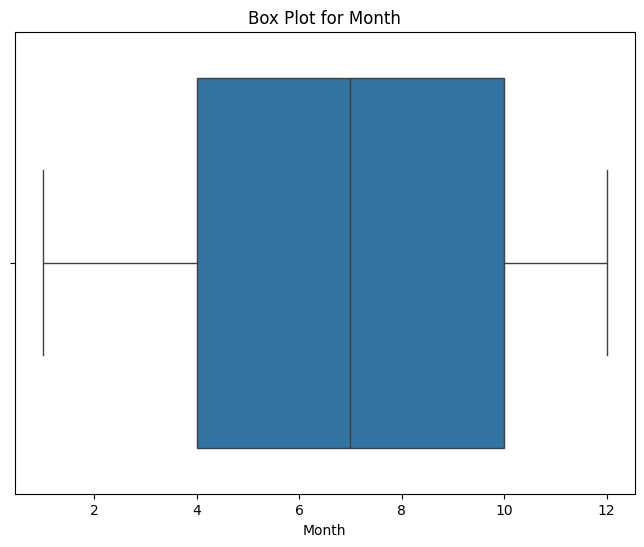

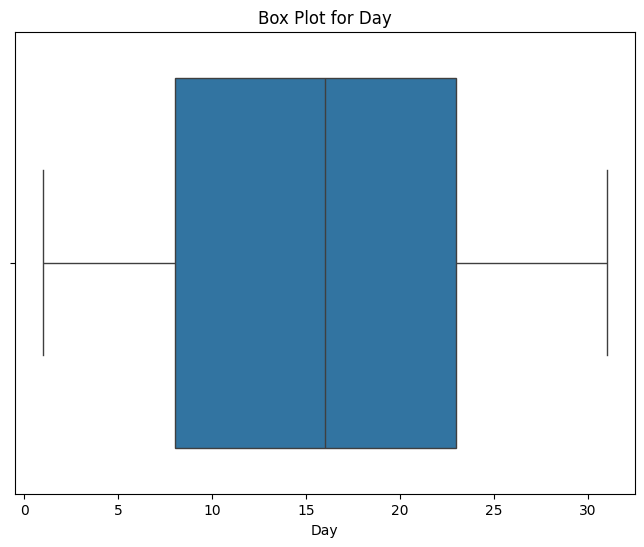

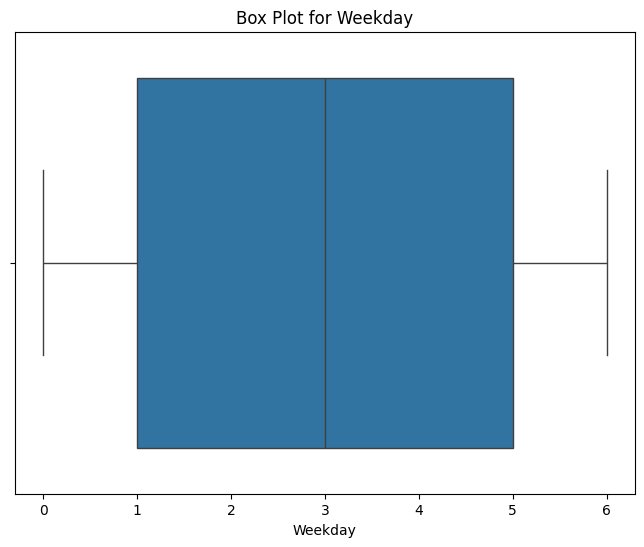

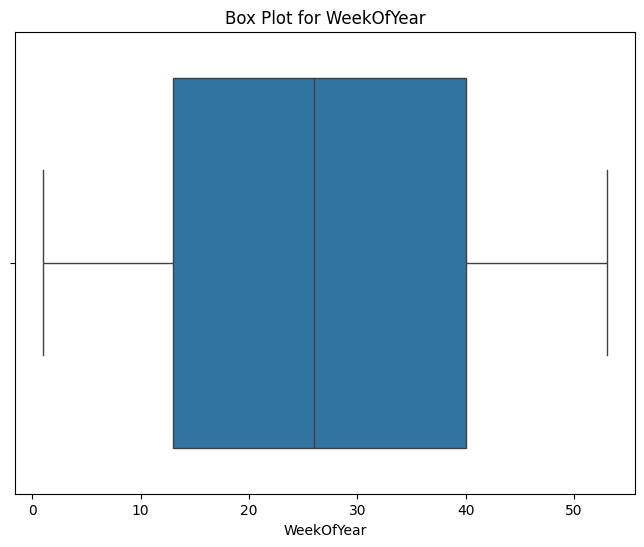

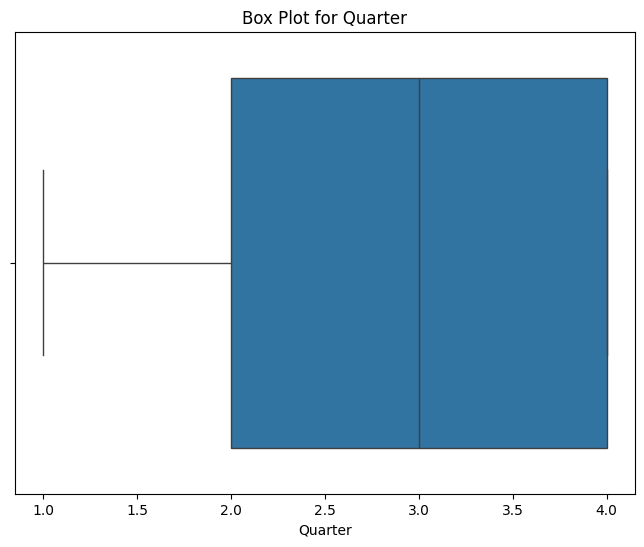

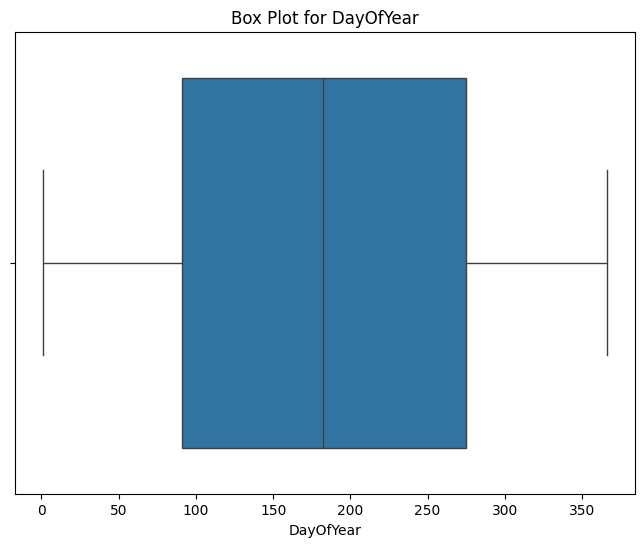

In [244]:
numerical_columns = main_df_hourly.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=main_df_hourly[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [245]:
num_duplicates = main_df_hourly.duplicated().sum()

print(f"\nNumber of duplicate rows: {num_duplicates}")

main_df_no_duplicates = main_df_hourly.drop_duplicates()


Number of duplicate rows: 5


### Date Based Splitting

In [246]:
# # train = main_df_no_duplicates.loc[main_df_no_duplicates.index < pd.Timestamp("2020-01-01")]
# # test = main_df_no_duplicates.loc[main_df_no_duplicates.index >= pd.Timestamp("2020-01-01")]

# fig, ax = plt.subplots(figsize=(15, 5))

# train['close'].plot(ax=ax, label='train')
# test['close'].plot(ax=ax, label='test')
# ax.axvline(pd.Timestamp("2020-01-01"), color='black', ls='--')

# plt.legend(["train", "test"])

# plt.title('Train Test Split')
# plt.show()

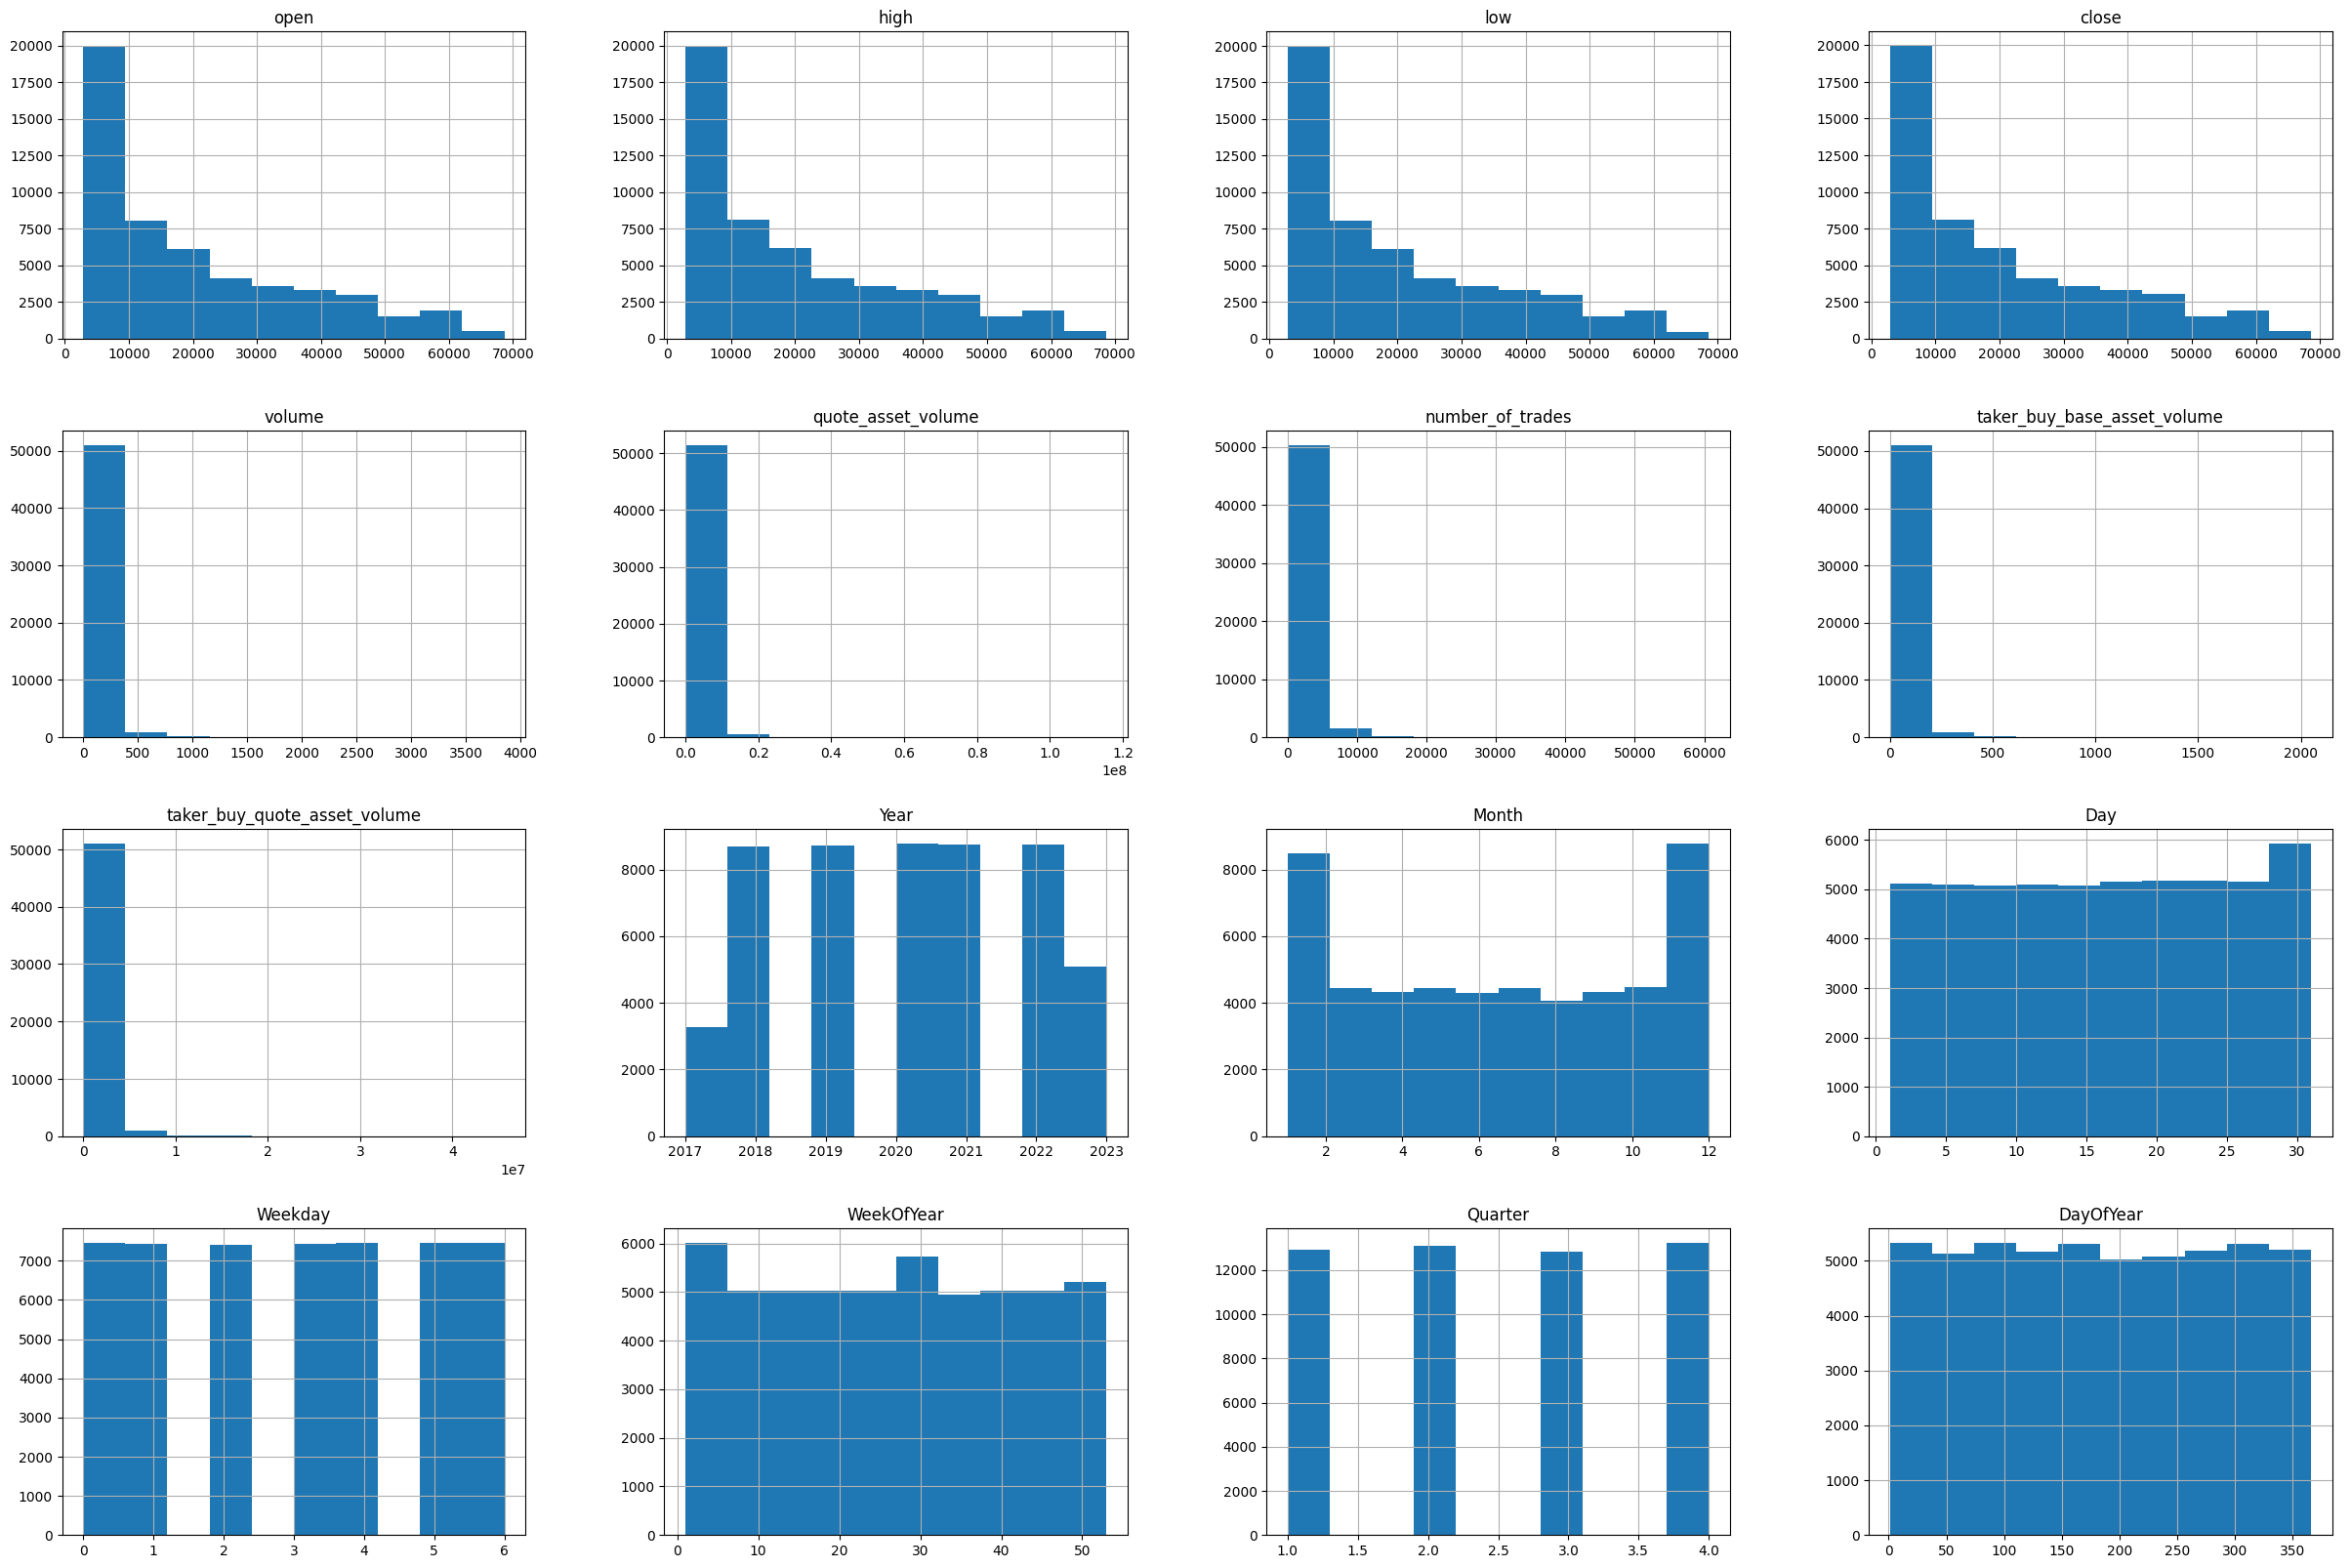

In [247]:
main_df_no_duplicates.hist(figsize=(30,20))
plt.show()

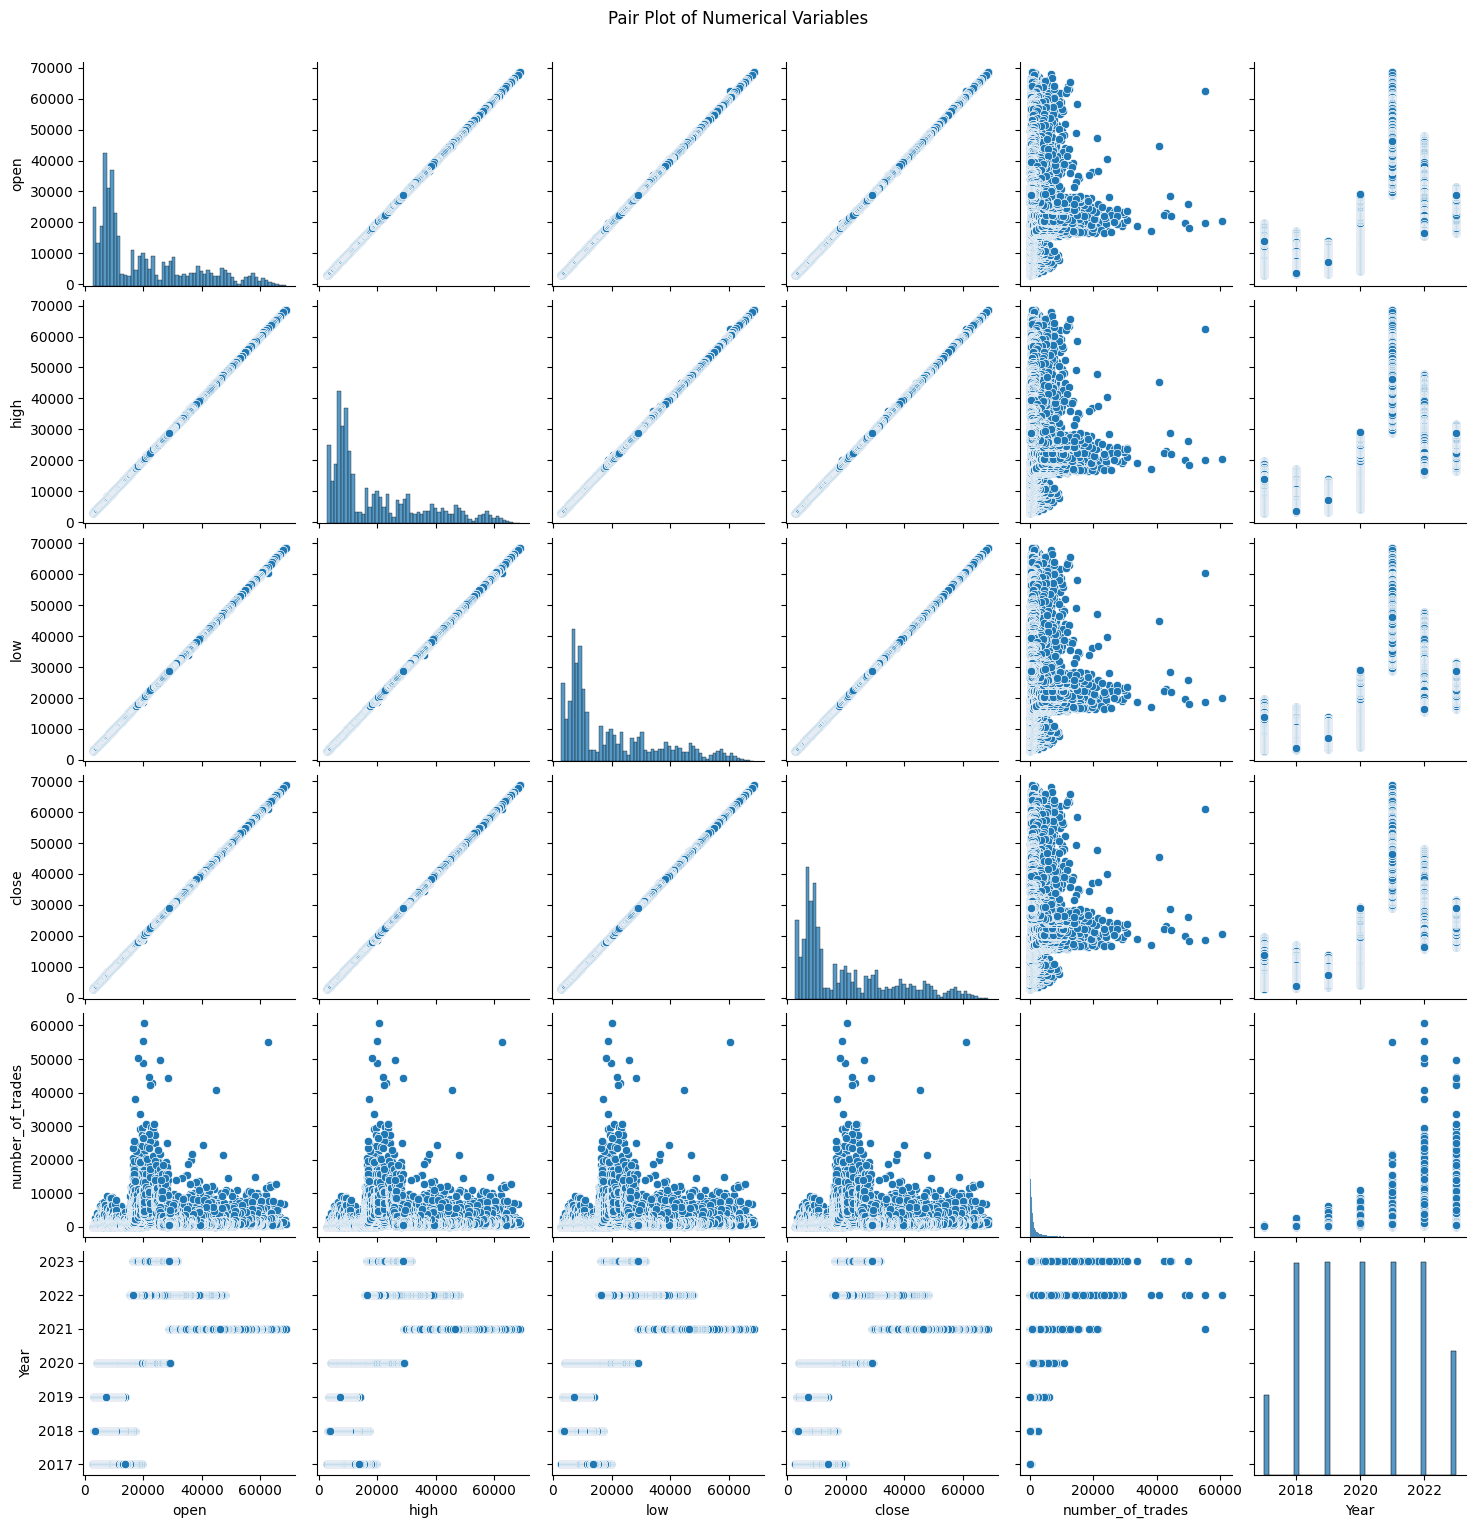

In [248]:
numerical_columns = ['open', 'high', 'low', 'close', 'number_of_trades', 'Year']

sns.pairplot(main_df_no_duplicates[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


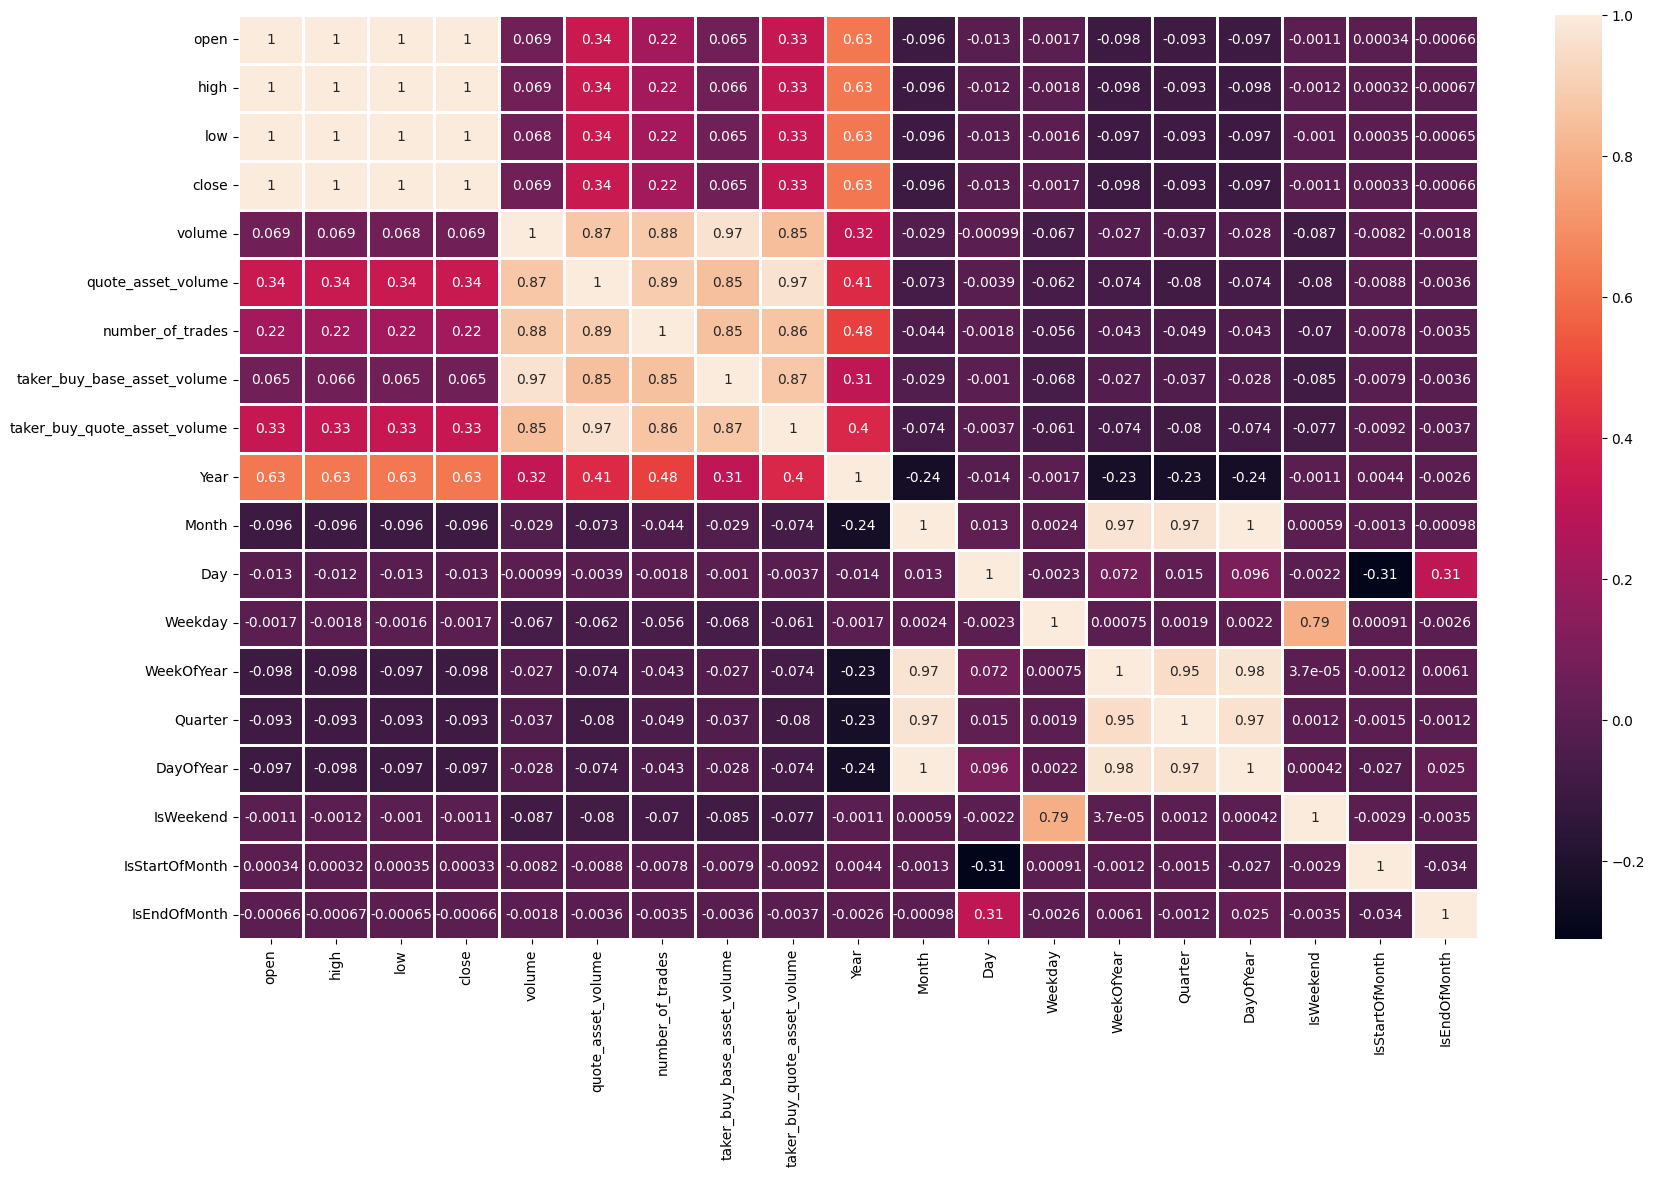

In [249]:
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(main_df_no_duplicates.corr(),annot=True,linewidths=1)
plt.show()

In [250]:
main_df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52077 entries, 2017-08-17 04:00:00 to 2023-08-01 13:00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          52077 non-null  float64
 1   high                          52077 non-null  float64
 2   low                           52077 non-null  float64
 3   close                         52077 non-null  float64
 4   volume                        52077 non-null  float64
 5   quote_asset_volume            52077 non-null  float64
 6   number_of_trades              52077 non-null  int64  
 7   taker_buy_base_asset_volume   52077 non-null  float64
 8   taker_buy_quote_asset_volume  52077 non-null  float64
 9   Year                          52077 non-null  int32  
 10  Month                         52077 non-null  int32  
 11  Day                           52077 non-null  int32  
 12  Weekday                  

In [214]:
# import pandas as pd
# from sklearn.feature_selection import mutual_info_regression, SelectKBest
# from sklearn.model_selection import train_test_split

# X = main_df_no_duplicates.drop(columns=['close'])
# y = main_df_no_duplicates['close']

# mutual_info = mutual_info_regression(X, y)

# k = 10
# selector = SelectKBest(mutual_info_regression, k=k)
# X_selected = selector.fit_transform(X, y)

# selected_indices = selector.get_support(indices=True)
# selected_features = X.columns[selected_indices]

# print("Selected Features:", selected_features)

Selected Features: Index(['open', 'high', 'low', 'volume', 'taker_buy_base_asset_volume', 'Year',
       'Month', 'Day', 'Weekday', 'WeekOfYear', 'Quarter', 'DayOfYear',
       'IsWeekend', 'IsStartOfMonth', 'IsEndOfMonth'],
      dtype='object')


Train/Test Split

In [252]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(main_df_no_duplicates, test_size=0.3, random_state=42)

X_train = train.drop(columns=['close'])
X_test = test.drop(columns=['close'])
y_train = train['close']
y_test = test['close']

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (36453, 18)
X_test shape: (15624, 18)
y_train shape: (36453,)
y_test shape: (15624,)


In [253]:
# scaler = StandardScaler()
# xtrain_scaled = scaler.fit_transform(X_train)
# xtest_scaled = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain_scaled = scaler.fit_transform(X_train)

xtest_scaled = scaler.transform(X_test)

# from sklearn.preprocessing import Normalizer

# scaler = Normalizer()

# xtrain_scaled = scaler.fit_transform(xtrain)

# xtest_scaled = scaler.transform(xtest)


In [255]:
outlier_detector = IsolationForest(contamination=0.05, random_state=42)

outliers_mask_train = outlier_detector.fit_predict(xtrain_scaled) == -1

xtrain_no_outliers = xtrain_scaled[~outliers_mask_train]
ytrain_no_outliers = y_train[~outliers_mask_train]

outliers_mask_test = outlier_detector.predict(xtest_scaled) == -1

xtest_no_outliers = xtest_scaled[~outliers_mask_test]
ytest_no_outliers = y_test[~outliers_mask_test]


print(f"Number of removed outliers in training data: {sum(outliers_mask_train)}")
print(f"Number of removed outliers in test data: {sum(outliers_mask_test)}")

Number of removed outliers in training data: 1823
Number of removed outliers in test data: 761


PCA to reduce dimensionality (under work)  --> in most cases provided low accuracy

In [99]:
# n_components = 10
# pca = PCA(n_components=n_components, random_state=42)
# X_train_pca = pca.fit_transform(xtrain_no_outliers)
# print("Explained Variance Ratio:", sum(pca.explained_variance_ratio_))
# X_test_pca = pca.transform(xtest_no_outliers)

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=7 with svd_solver='full'

### XGB Regressor Model

In [262]:
model = XGBRegressor(n_estimators=1000, early_stopping_rounds=50, random_state=42)

model.fit(xtrain_no_outliers, ytrain_no_outliers, eval_set=[(xtest_no_outliers, ytest_no_outliers)], verbose=False)

y_pred = model.predict(xtest_no_outliers)

mse = mean_squared_error(ytest_no_outliers, y_pred)
mae = mean_absolute_error(ytest_no_outliers, y_pred)
r2 = r2_score(ytest_no_outliers, y_pred)
rmse = mse ** 0.5

print("Test Set MSE:", mse)
print("Test Set MAE:", mae)
print("Test Set R²:", r2)
print("Test Set RMSE:", rmse)

Test Set MSE: 12766.90261638053
Test Set MAE: 61.634631847172926
Test Set R²: 0.9999502749730431
Test Set RMSE: 112.99071916038295


### ARIMA (AutoRegressive Integrated Moving Average)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forec

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                34630
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -140659.939
Date:                Thu, 23 May 2024   AIC                         281361.877
Time:                        22:32:27   BIC                         281539.379
Sample:                             0   HQIC                        281418.444
                              - 34630                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.218e+04    123.458   -260.666      0.000   -3.24e+04   -3.19e+04
x2           5.16e+04    108.757    474.450      0.000    5.14e+04    5.18e+04
x3          4.624e+04     93.554    494.293      0.0

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



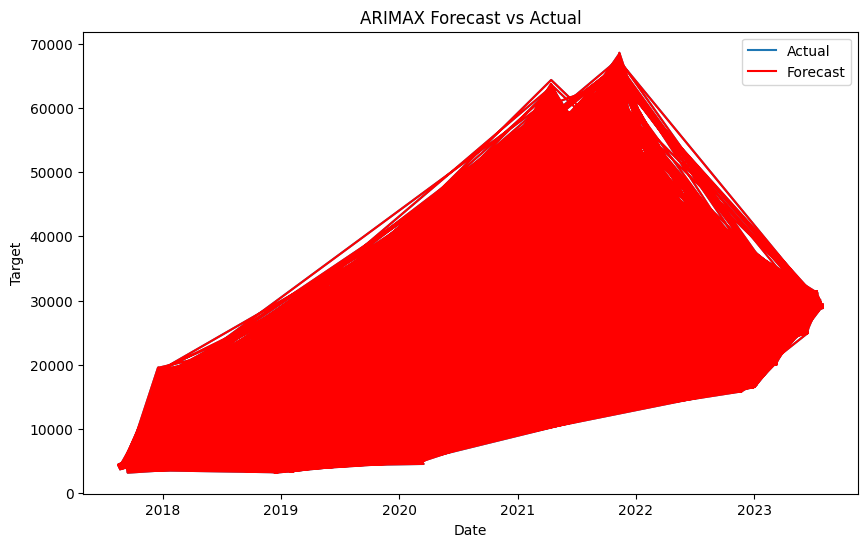

In [263]:
arimax_model = ARIMA(endog=ytrain_no_outliers, exog=xtrain_no_outliers, order=(1, 1, 1))
arimax_result = arimax_model.fit()

print(arimax_result.summary())

forecast = arimax_result.forecast(steps=len(xtest_no_outliers), exog=xtest_no_outliers)

plt.figure(figsize=(10, 6))
plt.plot(ytest_no_outliers.index, ytest_no_outliers, label='Actual')
plt.plot(ytest_no_outliers.index, forecast, label='Forecast', color='red')
plt.title('ARIMAX Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Target')
plt.legend()
plt.show()

In [264]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(ytest_no_outliers, forecast)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(ytest_no_outliers, forecast)
print("Mean Squared Error (MSE):", mse)

r2 = r2_score(ytest_no_outliers, forecast)
print("R-squared (Coefficient of Determination):", r2)

Mean Absolute Error (MAE): 7.195777182721266
Mean Squared Error (MSE): 188.41694027799824
R-squared (Coefficient of Determination): 0.9999992661464009


### Prophet (Facebook Prophet)

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



       timestamp_hour    close
0 2017-08-17 04:00:00  4261.48


22:32:44 - cmdstanpy - INFO - Chain [1] start processing
22:34:23 - cmdstanpy - INFO - Chain [1] done processing
c:\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Python312\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Python312\Lib\site-packages\prophet\plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:

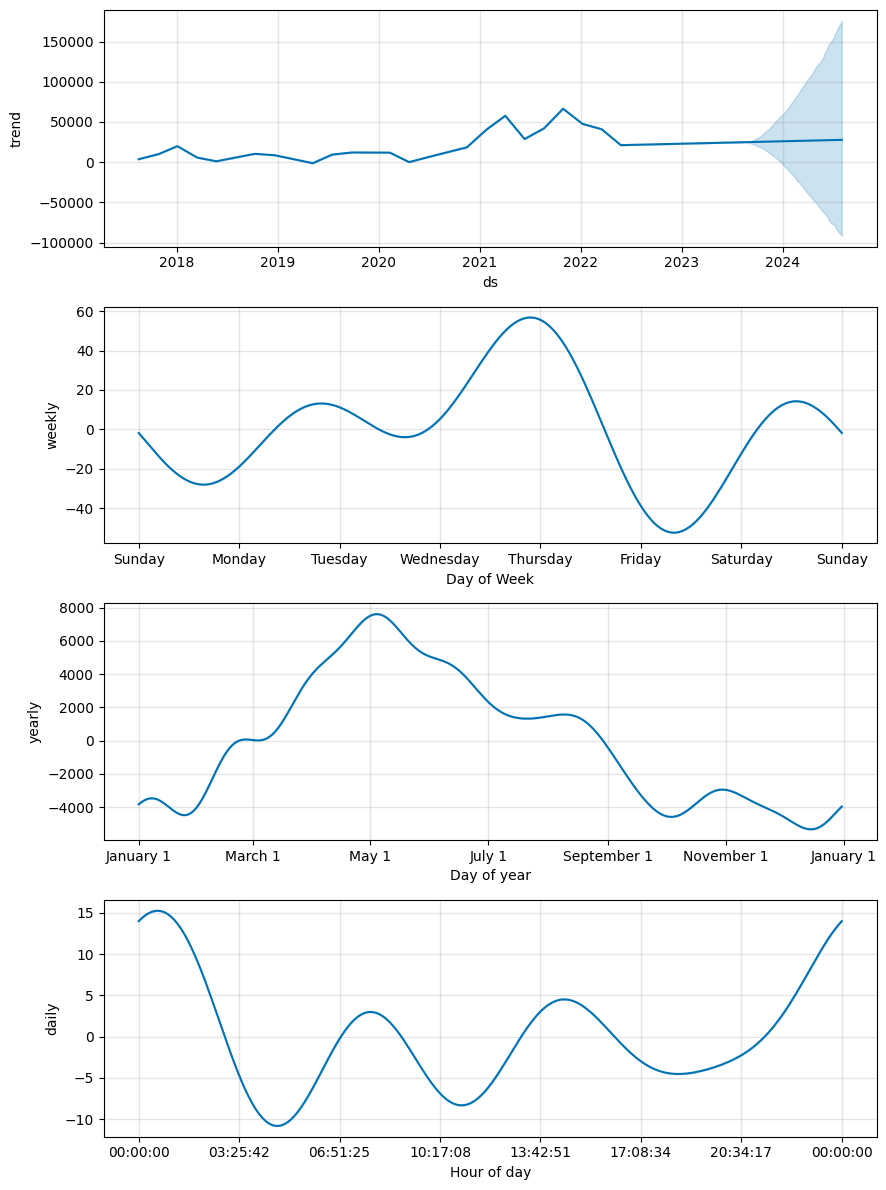

c:\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



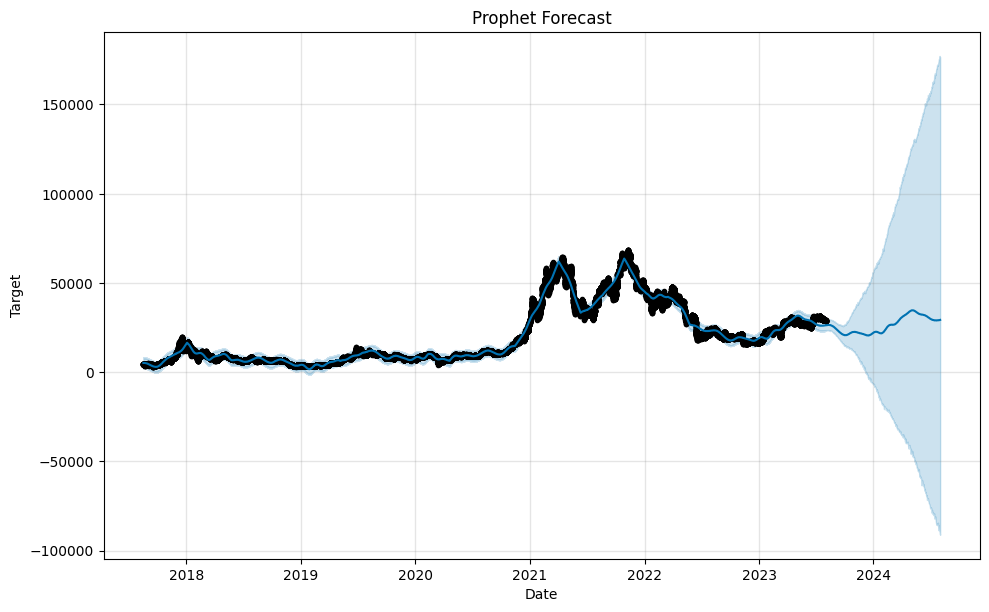

MSE: 5041371.326541363
MAE: 1571.9222544565052
R2 Score: 0.9804555851476725


In [265]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df_copy = main_df_no_duplicates.copy()
df_copy.reset_index(inplace=True)
df_copy = df_copy[['timestamp_hour', 'close']]
print(df_copy.head(1))

df_copy.columns = ['ds', 'y']
df_copy['ds'] = pd.to_datetime(df_copy['ds'])

model = Prophet()
model.fit(df_copy)

future = model.make_future_dataframe(periods=365, freq='D')
forecast = model.predict(future)

fig = model.plot_components(forecast)
plt.show()

fig = model.plot(forecast)
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Target')
plt.show()

merged_df = pd.merge(df_copy, forecast[['ds', 'yhat']], on='ds')
merged_df.dropna(inplace=True)

mse = mean_squared_error(merged_df['y'], merged_df['yhat'])
mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
r2 = r2_score(merged_df['y'], merged_df['yhat'])

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2 Score: {r2}')

### SVR (Support Vector Regression)

In [266]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)

model.fit(xtrain_no_outliers, ytrain_no_outliers)

train_score = model.score(xtrain_no_outliers, ytrain_no_outliers)
print("Training R-squared:", train_score)

p = model.predict(xtest_no_outliers)

mse = mean_squared_error(ytest_no_outliers, p)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(ytest_no_outliers, p)
print("Mean Absolute Error:", mae)

r2 = r2_score(ytest_no_outliers, p)
print("R-squared (Coefficient of Determination):", r2)

Training R-squared: 0.049528188485775115
Mean Squared Error: 245463441.19643328
Mean Absolute Error: 10416.59233640512
R-squared (Coefficient of Determination): 0.043959478882449665


### Random Forest Regressor

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=1000, random_state=42)

model.fit(xtrain_no_outliers, ytrain_no_outliers)

train_score = model.score(xtrain_no_outliers, ytrain_no_outliers)
print("Training R-squared:", train_score)

p = model.predict(xtest_no_outliers)

mse = mean_squared_error(ytest_no_outliers, p)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(ytest_no_outliers, p)
print("Mean Absolute Error:", mae)

r2 = r2_score(ytest_no_outliers, p)
print("R-squared (Coefficient of Determination):", r2)


Training R-squared: 0.9999998045314735
Mean Squared Error: 358.8787053197679
Mean Absolute Error: 9.973499586221205
R-squared (Coefficient of Determination): 0.999998602225314
